# Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Loading the Iris Dataset

In [3]:
data = load_iris(as_frame=True).frame

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = data.drop('target',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Scaling the data

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)

# finding the best number of clusters

In [27]:
inertia = []
score = []
for i in range(2,10):
  model = KMeans(max_iter=1000,n_clusters=i)
  labels = model.fit_predict(X)
  inertia.append(model.inertia_)
  score.append(silhouette_score(X,labels))


In [28]:
inertia

[222.36170496502294,
 140.90153181202442,
 114.50455255866575,
 91.04766991109521,
 81.52586124297079,
 74.85106203575,
 69.10071564170397,
 56.52578378748489]

In [29]:
score

[np.float64(0.5817500491982808),
 np.float64(0.4565352255831264),
 np.float64(0.41333355938896993),
 np.float64(0.34503345350274617),
 np.float64(0.3385799119753981),
 np.float64(0.3265497312424151),
 np.float64(0.28716336774081064),
 np.float64(0.3510993785067961)]

In [31]:
best = pd.DataFrame({"k values": range(2,10),'inertia':inertia,'Silhouette score':score})

In [32]:
best

,k values,inertia,Silhouette score
0,2,222.361705,0.581750
1,3,140.901532,0.456535
2,4,114.504553,0.413334
3,5,91.047670,0.345033
4,6,81.525861,0.338580
5,7,74.851062,0.326550
6,8,69.100716,0.287163
7,9,56.525784,0.351099


In [33]:
best.sort_values(by='Silhouette score',ascending = False)

,k values,inertia,Silhouette score
0,2,222.361705,0.581750
1,3,140.901532,0.456535
2,4,114.504553,0.413334
7,9,56.525784,0.351099
3,5,91.047670,0.345033
4,6,81.525861,0.338580
5,7,74.851062,0.326550
6,8,69.100716,0.287163


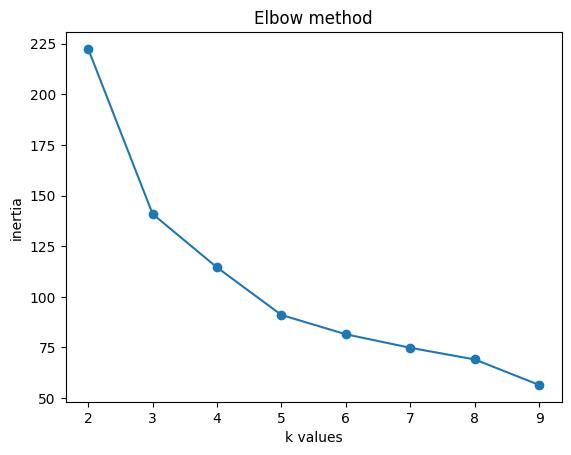

In [36]:
plt.plot(range(2,10),inertia,marker = 'o')
plt.xlabel('k values')
plt.ylabel('inertia')
plt.title('Elbow method')
plt.show()

In [40]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [41]:
final_model = KMeans(n_clusters=3,max_iter=1000)
labels = final_model.fit_predict(X)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

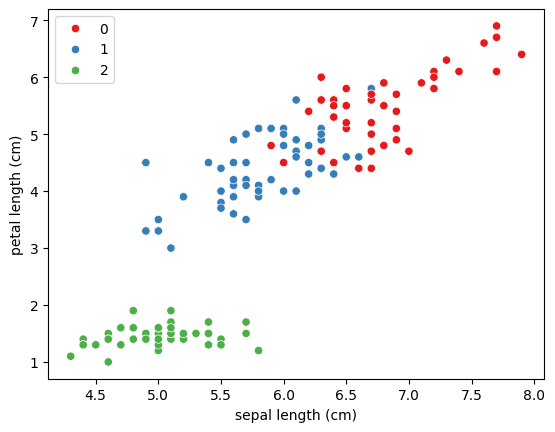

In [42]:
sns.scatterplot(data = data , x='sepal length (cm)',y = 'petal length (cm)',hue = labels,palette='Set1')

<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>

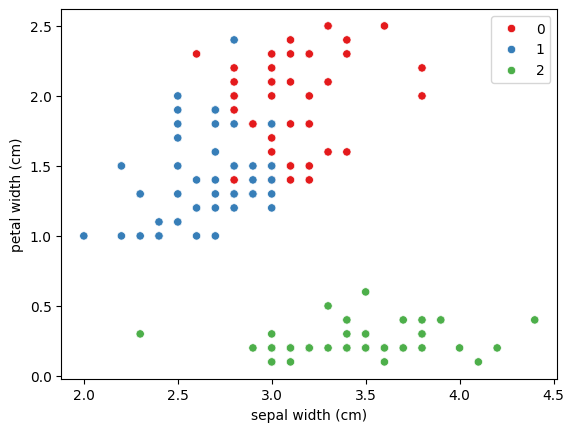

In [43]:
sns.scatterplot(data = data , x='sepal width (cm)',y = 'petal width (cm)',hue = labels,palette='Set1')

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

In [47]:
pca_df = pd.DataFrame(data = x_pca,columns = ['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


<Axes: xlabel='PCA1', ylabel='PCA2'>

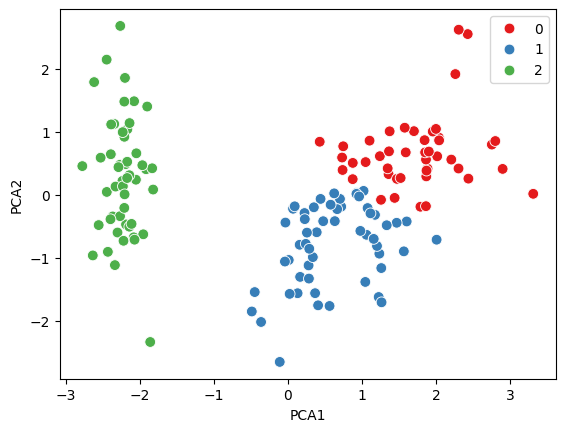

In [49]:
sns.scatterplot(data = pca_df, x='PCA1',y = 'PCA2',hue = labels,palette='Set1',s=60)